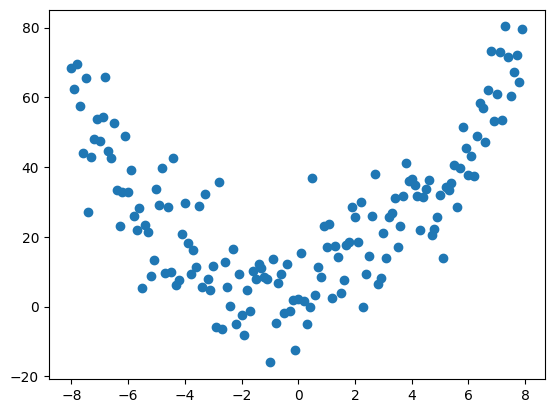

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics

x = np.arange(-8,8,0.1)
rand = 10 * np.random.normal(size = len(x))
y = 1*(x**2) + 1*x + 5+rand
plt.scatter(x,y)


In [2]:

#Combine the points into a dataframe:

d = {'x':x,'y':y}
data = pd.DataFrame(d)


In [3]:
#Splitting the data into training and testing sets

msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]


In [4]:
# Extracting the train_x and train_y from the training set


train_x = np.array(train[['x']])
train_y = np.array(train[['y']])

# Extracting the test_x and test_y from the testing set

test_x = np.array(test[['x']])
test_y = np.array(test[['y']])


In [5]:
nb_degree = 2
polynomial_features = preprocessing.PolynomialFeatures(degree = nb_degree)


In [6]:
train_x_transformed = polynomial_features.fit_transform(train_x.reshape(-1,1))


In [7]:
model = linear_model.LinearRegression()
model.fit(train_x_transformed, train_y)


LinearRegression()

In [8]:
test_x_transformed = polynomial_features.fit_transform(test_x.reshape(-1,1))
prediction = model.predict(test_x_transformed)


In [9]:
rmse = np.sqrt(metrics.mean_squared_error(test_y,prediction))
r2 = metrics.r2_score(test_y, prediction)
print('RMSE: ', rmse)
print('R2: ', r2)


RMSE:  10.20733768750647
R2:  0.799430946510638


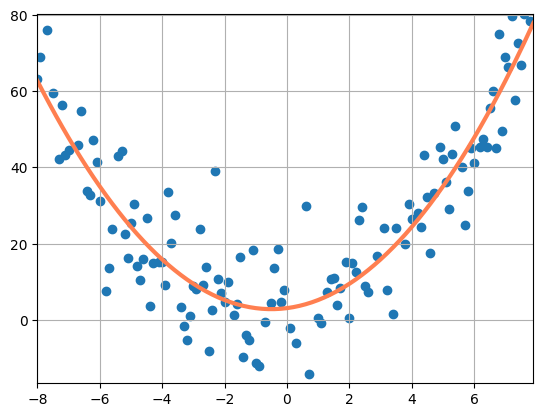

In [10]:
x_transformed = polynomial_features.fit_transform(x.reshape(-1,1))
prediction_train = model.predict(x_transformed)

x_min = np.amin(x)
x_max = np.amax(x)
y_min = np.amin(y)
y_max = np.amax(y)

x_new = np.linspace(x_min, x_max, len(x_transformed))
x_new = x_new[:,np.newaxis]

plt.plot(x_new, prediction_train, color='coral', linewidth=3)
plt.grid()
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.scatter(train_x,train_y)
